In [1]:
%matplotlib inline
import sys
sys.path.append("../../")
from dnaquine import *

**pCMV-Target-AID construction**  
The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID, which were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. 

In [2]:
pCMV_ABE             = DNA(record="input/addgene_102919.gbk",project="pCMV_ABE")
pCMV_nCas_PmCDA1_ugi = DNA(record="input/addgene_79620.gbk", project="pCMV-nCas-PmCDA1-ugi")

In [3]:
description1 = "The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) \
(Addgene 79620) using primer pairs RS045/HM129."
RS045 = "GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG"
HM129 = "CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(RS045[-18:], key_attribute="sequence", process_description=description1)[0] #Search FW primer binding region
RV    = pCMV_nCas_PmCDA1_ugi.finddna(HM129[-18:], key_attribute="sequence", process_description=description1)[0] #Search RV primer binding region
frag1 = cropdna(pCMV_nCas_PmCDA1_ugi, FW.end, RV.start, process_description=description1)
frag1 = modifyends(frag1, RS045, flipdna(HM129), process_description=description1) #Simulate PCR
#Add annotation
editfeature(frag1, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f1"), new_copy=False)
editfeature(frag1, key_attribute="feature_id", query="f1", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag1, key_attribute="feature_id", query="f1", target_attribute="qualifier:label", operation=createattribute("fragment-1"), new_copy=False)

In [4]:
description2 = "The C-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) \
(Addgene 79620) using primer pairs HM128/RS046"
HM128 = "CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC"
RS046 = "TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(HM128[-18:], key_attribute="sequence", process_description=description2)[0]
RV    = pCMV_nCas_PmCDA1_ugi.finddna(RS046[-18:], key_attribute="sequence", process_description=description2)[0]
frag2 = cropdna(pCMV_nCas_PmCDA1_ugi, FW.end, RV.start, process_description=description2)
frag2 = modifyends(frag2, HM128, flipdna(RS046), process_description=description2)
#Add annotation
editfeature(frag2, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f2"), new_copy=False)
editfeature(frag2, key_attribute="feature_id", query="f2", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag2, key_attribute="feature_id", query="f2", target_attribute="qualifier:label", operation=createattribute("fragment-2"), new_copy=False)

In [5]:
description3 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048"
RS047  = "ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC" 
RS048  = "CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG"
FW     = pCMV_ABE.finddna(RS047[-18:], key_attribute="sequence", process_description=description3)[0] 
RV     = pCMV_ABE.finddna(RS048[-18:], key_attribute="sequence", process_description=description3)[0]
frag3  = cropdna(pCMV_ABE, FW.end, RV.start, process_description=description3)
frag3  = modifyends(frag3, RS047, flipdna(RS048), process_description=description3)
#Add annotation
editfeature(frag3, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f3"), new_copy=False)
editfeature(frag3, key_attribute="feature_id", query="f3", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag3, key_attribute="feature_id", query="f3", target_attribute="qualifier:label", operation=createattribute("fragment-3"), new_copy=False)

In [6]:
description4 = "The Target-AID plasmid (pCMV-Target-AID) was constructed \
by assembling the two insert fragments and the backbone fragment."
frag1 = modifyends(frag1, "*{25}/-{25}","-{28}/*{28}", process_description=description4)
frag2 = modifyends(frag2, "*{28}/-{28}","-{25}/*{25}", process_description=description4)
frag3 = modifyends(frag3, "*{25}/-{25}","-{25}/*{25}", process_description=description4) 
pCMV_Target_AID = joindna(frag1, frag2, frag3, topology="circular", project="pCMV-Target-AID", process_description=description4)

In [7]:
Cas9 = pCMV_Target_AID.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_AID = cutdna(pCMV_Target_AID, Cas9.start)[0]
pCMV_Target_AID = joindna(pCMV_Target_AID)
pCMV_Target_AID.printfeature()
pCMV_Target_AID.writedna("output/pCMV-Target-AID.gbk")
quine(pCMV_Target_AID, "reconstructed_genbank/pCMV-Target-AID_reconstruction.py") 

feature_id  feature_type  qualifier:label     start  end   strand  
100         CDS           Cas9(D10A)          0      4104  +       
200         source        null                0      5299  +       
3600        source        pCMV-Target-AID     0      8752  +       
400         misc_feature  fragment-2          2504   5335  +       
500         CDS           SV40 NLS            4116   4137  +       
600         CDS           3xFLAG              4344   4410  +       
700         CDS           PmCDA1              4416   5043  +       
800         CDS           SV40 NLS            5043   5064  +       
900         CDS           UGI                 5070   5299  +       
1000        misc_feature  fragment-3          5310   8713  +       
1100        source        null                5345   8681  +       
1200        primer_bind   BGH-rev             5347   5365  -       
1300        polyA_signal  bGH poly(A) signal  5353   5578  +       
1400        primer_bind   M13 rev             56

**pCMV-Target-ACE construction**  
The Target-ACE plasmid (pCMV-Target-ACE) was constructed with a fragment encoding a plasmid backbone as well as ABE7.10 amplified from pCMV-ABE7.10 using RS047/RS052 and a fragment encoding the C-terminus region of Target-AID amplified from pcDNA-pCMV-nCas9 using RS051/RS046.

In [8]:
description5 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS052"
RS052 = "ACCTCCTCCACCGTCACCCCCAAGCTGTGACA"
FW    = pCMV_ABE.finddna(RS047[-18:],key_attribute="sequence", process_description=description5)[0]
RV    = pCMV_ABE.finddna(RS052[-18:],key_attribute="sequence", process_description=description5)[0]
frag4 = cropdna(pCMV_ABE, FW.end, RV.start, process_description=description5)
frag4 = modifyends(frag4, RS047, flipdna(RS052), process_description=description5)
#Add annotation
editfeature(frag4, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f4"), new_copy=False)
editfeature(frag4, key_attribute="feature_id", query="f4", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag4, key_attribute="feature_id", query="f4", target_attribute="qualifier:label", operation=createattribute("fragment-4"), new_copy=False)

In [9]:
description6 = "The insert fragment encoding the C-terminus region of Target-AID was \
amplified from pcDNA-pCMV-nCas9 using RS051/RS046."
RS051 = "GCTTGGGGGTGACGGTGGAGGAGGTACCGGCGG"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(RS051[-18:], key_attribute="sequence", process_description=description6)[0]
RV    = pCMV_nCas_PmCDA1_ugi.finddna(RS046[-18:], key_attribute="sequence", process_description=description6)[0]
frag5 = cropdna(pCMV_nCas_PmCDA1_ugi, FW.end, RV.start, process_description=description6)
frag5 = modifyends(frag5, RS051, flipdna(RS046), process_description=description6)
#Add annotation
editfeature(frag5, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f5"), new_copy=False)
editfeature(frag5, key_attribute="feature_id", query="f5", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag5, key_attribute="feature_id", query="f5", target_attribute="qualifier:label", operation=createattribute("fragment-5"), new_copy=False)

In [10]:
description7 = "The Target-ACE plasmid (pCMV-Target-ACE) was constructed by \
assembling the insert fragment and a backbone fragment."
frag4 = modifyends(frag4, "*{25}/-{25}","-{25}/*{25}", process_description=description7)
frag5 = modifyends(frag5, "*{25}/-{25}","-{25}/*{25}", process_description=description7)
pCMV_Target_ACE = joindna(frag4, frag5, topology="circular", project="pCMV-Target-ACE", process_description=description7)

In [11]:
Cas9 = pCMV_Target_ACE.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_ACE = cutdna(pCMV_Target_ACE, Cas9.start)[0]
pCMV_Target_ACE = joindna(pCMV_Target_ACE)
pCMV_Target_ACE.printfeature()
pCMV_Target_ACE.writedna("output/pCMV-Target-ACE.gbk")
quine(pCMV_Target_ACE, "reconstructed_genbank/pCMV-Target-ACE_reconstruction.py") 

feature_id  feature_type  qualifier:label     start  end   strand  
0           source        null                0      4081  +       
100         CDS           Cas9(D10A)          0      4081  +       
3600        source        pCMV-Target-ACE     0      9856  +       
400         misc_feature  fragment-5          4088   5299  +       
500         source        null                4121   5263  +       
600         CDS           3xFLAG              4308   4374  +       
700         CDS           PmCDA1              4380   5007  +       
800         CDS           SV40 NLS            5007   5028  +       
900         CDS           UGI                 5034   5263  +       
1000        misc_feature  fragment-4          5274   4113  +       
1200        source        null                5309   8759  +       
1300        primer_bind   BGH-rev             5311   5329  -       
1400        polyA_signal  bGH poly(A) signal  5317   5542  +       
1500        primer_bind   M13 rev             56

**pCMV-Target-AIDmax construction**  
To construct the Target-AIDmax plasmid (pCMV-Target-AIDmax), the pUC-optimized-PmCDA1-ugi plasmid encoding the codon-optimized C-terminal region of Target-AIDmax was first constructed by the gene synthesis service of GenScript. This C terminus fragment was then amplified with primer pair SI1304/SI1307 and assembled with a nCas9 fragment amplified from pCMV-BE4max using SI1308/SI1305 and a backbone fragment amplified from pCMV-ABEmax using SI1310/SI1309. 

In [12]:
pCMV_ABEmax    = DNA(record="input/addgene_112095.gbk", project="pCMV-ABEmax")
pCMV_BE4max    = DNA(record="input/addgene_112093.gbk", project="pCMV-BE4max")
opt_pmCDA1_ugi = DNA(record="input/puc-optimized-pmcda1-ugi.gbk", project="opt-pmCDA1-ugi")

In [13]:
description10 = "The fragment encoding a nCas9 fragment was amplified from pCMV-BE4max using SI1308/SI1305."
SI1308 = "ACCAAAGAAGAAGCGGAAAGTCGACAAGAAGTACAGCATCGGCCT"
SI1305 = "GTCACCTCCCAGCTGAGACAGGTCG"
FW     = pCMV_BE4max.finddna(SI1308[-18:], key_attribute="sequence", process_description=description10)[0]
RV     = pCMV_BE4max.finddna(SI1305[-18:], key_attribute="sequence", process_description=description10)[0]
frag6  = cropdna(pCMV_BE4max, FW.end, RV.start, process_description=description10)
frag6  = modifyends(frag6, SI1308, flipdna(SI1305), process_description=description10)
#Add annotation
editfeature(frag6, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f6"), new_copy=False)
editfeature(frag6, key_attribute="feature_id", query="f6", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag6, key_attribute="feature_id", query="f6", target_attribute="qualifier:label", operation=createattribute("fragment-6"), new_copy=False)

In [14]:
description8 = "The fragment encoding the codon-optimized C-terminal region of Target-AIDmax \
was amplified with primer pair SI1304/SI1307."
SI1304 = "CCTGTCTCAGCTGGGAGGTGACGGCGGAGGAGGAACTGGAGGAGG"
SI1307 = "TCAGCGGGTTTAAACTCATTATCACAGCATTTTGATTTTGTTCTC"
FW     = opt_pmCDA1_ugi.finddna(SI1304[-18:], key_attribute="sequence", process_description=description8)[0]
RV     = opt_pmCDA1_ugi.finddna(SI1307[-18:], key_attribute="sequence", process_description=description8)[0]
frag7  = cropdna(opt_pmCDA1_ugi, FW.end, RV.start, process_description=description8)
frag7  = modifyends(frag7, SI1304, flipdna(SI1307), process_description=description8)
#Add annotation
editfeature(frag7, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f7"), new_copy=False)
editfeature(frag7, key_attribute="feature_id", query="f7", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag7, key_attribute="feature_id", query="f7", target_attribute="qualifier:label", operation=createattribute("fragment-7"), new_copy=False)

In [15]:
description9 = "The backbone fragment was amplified from pCMV-ABEmax using SI1310/SI1309."
SI1310 = "TGATAATGAGTTTAAACCCGCTGA"
SI1309 = "GACTTTCCGCTTCTTCTTTGGTGACTCG"
FW     = pCMV_ABEmax.finddna(SI1310[-18:], key_attribute="sequence", process_description=description9)[0]
RV     = pCMV_ABEmax.finddna(SI1309[-18:], key_attribute="sequence", process_description=description9)[0]
frag8  = cropdna(pCMV_ABEmax, FW.end, RV.start, process_description=description9)
frag8  = modifyends(frag8, SI1310, flipdna(SI1309), process_description=description9)
#Add annotation
editfeature(frag8, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f8"), new_copy=False)
editfeature(frag8, key_attribute="feature_id", query="f8", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag8, key_attribute="feature_id", query="f8", target_attribute="qualifier:label", operation=createattribute("fragment-8"), new_copy=False)

In [16]:
description11 = "The Target-AIDmax plasmid (pCMV-Target-AIDmax) was constructed \
by assembling the two insert fragments and the backbone fragment."
frag6 = modifyends(frag6, "*{22}/-{22}", "-{22}/*{22}", process_description=description11) 
frag7 = modifyends(frag7, "*{22}/-{22}", "-{24}/*{24}", process_description=description11) 
frag8 = modifyends(frag8, "*{24}/-{24}", "-{22}/*{22}", process_description=description11) 
pCMV_Target_AIDmax = joindna(frag6, frag7, frag8, topology="circular", project="pCMV-Target-AIDmax", process_description=description11)

In [17]:
Cas9 = pCMV_Target_AIDmax.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_AIDmax = cutdna(pCMV_Target_AIDmax, Cas9.start)[0]
pCMV_Target_AIDmax = joindna(pCMV_Target_AIDmax)
pCMV_Target_AIDmax.printfeature()
pCMV_Target_AIDmax.writedna("output/pCMV-Target-AIDmax.gbk")
quine(pCMV_Target_AIDmax, "reconstructed_genbank/pCMV-Target-AIDmax_reconstruction.py") 

feature_id  feature_type  qualifier:label         start  end   strand  
0           source        null                    0      4053  +       
100         CDS           Cas9(D10A)              0      4053  +       
3800        source        pCMV-Target-AIDmax      0      8725  +       
400         misc_feature  fragment-7              4056   5287  +       
500         misc_feature  GS_2x GS linker         4101   4108  +       
600         source        null                    4101   5242  +       
700         misc_feature  GenScript J9270EH080-1  4101   5242  +       
800         misc_feature  GS_Mutated SH3 domain   4108   4279  +       
900         misc_feature  SG_3x FLAG              4279   4357  +       
1000        CDS           PmCDA1                  4357   4984  +       
1100        CDS           SV40 NLS                4984   5005  +       
1200        CDS           UGI                     5011   5242  +       
1300        misc_feature  fragment-8              5263   8702  +

**pCMV-BE4max(C) construction**  
The BE4max(C) plasmid (pCMV-BE4max(C)) was constructed to replace the C-terminal region of Target-AIDmax with the codon-optimized rAPOBEC1 and 2×UGI domains of BE4max. To this end, an nCas9 fragment obtained from pCMV-Target-AIDmax using SI447/SI1105 was assembled with rAPOBEC1 and 2×UGI fragments obtained from BE4max using SI1352/SI1357 and SI1359/SI1350, respectively, and a backbone obtained from pCMV-BE4max using SI1351/SI448. 

In [18]:
description12 = "An nCas9 fragment was obtained from pCMV-Target-AIDmax using SI447/SI1105."
SI447  = "GCCACATAGCAGAACTTTAAAAGTG"
SI1105 = "CTTGTCATCGTCATCCTTGTA"
FW     = pCMV_Target_AIDmax.finddna(SI447[-18:],  key_attribute="sequence", process_description=description12)[0]
RV     = pCMV_Target_AIDmax.finddna(SI1105[-18:], key_attribute="sequence", process_description=description12)[0]
frag9  = cropdna(pCMV_Target_AIDmax, FW.end, RV.start, process_description=description12)
frag9  = modifyends(frag9, SI447, flipdna(SI1105), process_description=description12)
#Add annotation
editfeature(frag9, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f9"), new_copy=False)
editfeature(frag9, key_attribute="feature_id", query="f9", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag9, key_attribute="feature_id", query="f9", target_attribute="qualifier:label", operation=createattribute("fragment-9"), new_copy=False)

In [19]:
 description13 = "The rAPOBEC1 fragment was obtained from BE4max using SI1352/SI1357."
SI1352  = "GATGACGATGACAAGTCTGGCTCCTCAGAGACTGGGCCTGTCGCC"
SI1357  = "CTTCAGGCCTGTGGCCCACAGGAT"
FW      = pCMV_BE4max.finddna(SI1352[-18:], key_attribute="sequence", process_description=description13)[0]
RV      = pCMV_BE4max.finddna(SI1357[-18:], key_attribute="sequence", process_description=description13)[0]
frag10  = cropdna(pCMV_BE4max, FW.end, RV.start, process_description=description13)
frag10  = modifyends(frag10, SI1352, flipdna(SI1357), process_description=description13)
#Add annotation
editfeature(frag10, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f10"), new_copy=False)
editfeature(frag10, key_attribute="feature_id", query="f10", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag10, key_attribute="feature_id", query="f10", target_attribute="qualifier:label", operation=createattribute("fragment-10"), new_copy=False)

In [20]:
description14 = "The 2×UGI fragment was obtained from BE4max using SI1359/SI1350."
SI1359  = "ATCCTGTGGGCCACAGGCCTGAAGACTAATCTGAGCGACATCATT"
SI1350  = "GATCAGCGGGTTTAAACTCATTATTAGACTTTCCTCTTCTTCTTG"
FW      = pCMV_BE4max.finddna(SI1359[-18:], key_attribute="sequence", process_description=description14)[0]
RV      = pCMV_BE4max.finddna(SI1350[-18:], key_attribute="sequence", process_description=description14)[0]
frag11  = cropdna(pCMV_BE4max, FW.end, RV.start, process_description=description14)
frag11  = modifyends(frag11, SI1359, flipdna(SI1350), process_description=description14)
#Add annotation
editfeature(frag11, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f11"), new_copy=False)
editfeature(frag11, key_attribute="feature_id", query="f11", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag11, key_attribute="feature_id", query="f11", target_attribute="qualifier:label", operation=createattribute("fragment-11"), new_copy=False)

In [21]:
description15 = "The backbone fragment was obtained from BE4max using SI1351/SI448."
SI1351  = "TAATAATGAGTTTAAACCCGCTGATC"
SI448   = "CACTTTTAAAGTTCTGCTATGTGGC"
FW      = pCMV_BE4max.finddna(SI1351[-18:], key_attribute="sequence", process_description=description15)[0]
RV      = pCMV_BE4max.finddna(SI448[-18:],  key_attribute="sequence", process_description=description15)[0]
frag12  = cropdna(pCMV_BE4max, FW.end, RV.start, process_description=description15)
frag12  = modifyends(frag12, SI1351, flipdna(SI448), process_description=description15)
#Add annotation
editfeature(frag12, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f12"), new_copy=False)
editfeature(frag12, key_attribute="feature_id", query="f12", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag12, key_attribute="feature_id", query="f12", target_attribute="qualifier:label", operation=createattribute("fragment-12"), new_copy=False)

In [22]:
description16 = "The BE4max(C) plasmid (pCMV-BE4max(C)) was constructed\
by assembling the three insert fragments and the backbone fragment."
frag9  = modifyends(frag9,"*{25}/-{25}","-{15}/*{15}")
frag10 = modifyends(frag10,"*{15}/-{15}","-{24}/*{24}")
frag11 = modifyends(frag11,"*{24}/-{24}","-{26}/*{26}")
frag12 = modifyends(frag12,"*{26}/-{26}","-{25}/*{25}")
pCMV_BE4maxC = joindna(frag9, frag10, frag11, frag12, topology="circular",
                       project="pCMV-BE4max(C)", process_description=description16)

In [23]:
Cas9 = pCMV_BE4maxC.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_BE4maxC = cutdna(pCMV_BE4maxC, Cas9.start)[0]
pCMV_BE4maxC = joindna(pCMV_BE4maxC)
pCMV_BE4maxC.printfeature()
pCMV_BE4maxC.writedna("output/pCMV-BE4maxC.gbk")
quine(pCMV_BE4maxC, "reconstructed_genbank/pCMV-BE4maxC_reconstruction.py") 

feature_id  feature_type  qualifier:label         start  end   strand  
0           source        null                    0      4053  +       
100         CDS           Cas9(D10A)              0      4053  +       
4800        source        pCMV-BE4max(C)          0      9094  +       
500         misc_feature  fragment-7              4056   4330  +       
600         misc_feature  GS_2x GS linker         4101   4108  +       
700         source        null                    4101   4330  +       
800         misc_feature  GenScript J9270EH080-1  4101   4330  +       
900         misc_feature  GS_Mutated SH3 domain   4108   4279  +       
1000        misc_feature  SG_3x FLAG              4279   4330  +       
1100        misc_feature  fragment-10             4336   5041  +       
1200        source        null                    4381   5017  +       
1300        CDS           APOBEC-1                4381   5017  +       
1400        misc_feature  fragment-11             5017   5658  +

**pCMV-Target-ACEmax construction**  
The Target-ACEmax plasmid (pCMV-Target-ACEmax) was constructed by assembling an ABEmax fragment obtained from pCMV-ABEmax using SI945/SI1305, a fragment encoding the C-terminus region of Target-AIDmax obtained from pUC-optimized-PmCDA1-ugi using SI1304/SI1307, and a plasmid backbone obtained from pCMV-ABEmax using SI1310/SI1309. 

In [24]:
description17 = "An ABEmax fragment obtained from pCMV-ABEmax using SI945/SI1305"
SI945   = "AGATCCGCGGCCGCTAATACGACTCACTATAGG"
FW      = pCMV_ABEmax.finddna(SI945[-18:],  key_attribute="sequence", process_description=description17)[0]
RV      = pCMV_ABEmax.finddna(SI1305[-18:], key_attribute="sequence", process_description=description17)[0]
frag13  = modifyends(cropdna(pCMV_ABEmax, FW.end, RV.start), SI945, flipdna(SI1305), process_description=description17)
#Add annotation
editfeature(frag13, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f13"), new_copy=False)
editfeature(frag13, key_attribute="feature_id", query="f13", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag13, key_attribute="feature_id", query="f13", target_attribute="qualifier:label", operation=createattribute("fragment-13"), new_copy=False)

In [25]:
description18 = "The Target-ACEmax plasmid (pCMV-BE4max(C)) was constructed \
by assembling a insert fragment and two backbone fragments."
frag7  = modifyends(frag7,  "*{22}/-{22}","-{24}/*{24}",   process_description=description18)
frag8  = modifyends(frag8,  "*{24}/-{24}","-{103}/*{103}", process_description=description18)
frag13 = modifyends(frag13, "*{103}/-{103}","-{22}/*{22}", process_description=description18)

In [26]:
pCMV_Target_ACEmax = joindna(frag7, frag8, frag13, topology="circular", project="pCMV-Target-ACEmax", process_description=description18)
pCMV_Target_ACEmax._unique_id

'pCMV-Target-ACEmax'

In [27]:
Cas9 = pCMV_Target_ACEmax.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_Target_ACEmax = cutdna(pCMV_Target_ACEmax, Cas9.start)[0]
pCMV_Target_ACEmax = joindna(pCMV_Target_ACEmax)
pCMV_Target_ACEmax.printfeature()
pCMV_Target_ACEmax.writedna("output/pCMV-Target-ACEmax.gbk")
quine(pCMV_Target_ACEmax, "reconstructed_genbank/pCMV-Target-ACEmax_reconstruction.py") 

feature_id  feature_type  qualifier:label         start  end   strand  
0           source        null                    0      4076  +       
100         CDS           Cas9(D10A)              0      4076  +       
4200        source        pCMV-Target-ACEmax      0      9913  +       
400         misc_feature  fragment-7              4079   5310  +       
600         misc_feature  GS_2x GS linker         4124   4131  +       
700         source        null                    4124   5265  +       
800         misc_feature  GenScript J9270EH080-1  4124   5265  +       
900         misc_feature  GS_Mutated SH3 domain   4131   4302  +       
1000        misc_feature  SG_3x FLAG              4302   4380  +       
1100        CDS           PmCDA1                  4380   5007  +       
1200        CDS           SV40 NLS                5007   5028  +       
1300        CDS           UGI                     5034   5265  +       
1400        misc_feature  fragment-8              5286   8725  +

**pCMV-ACBEmax construction**  
The ACBEmax plasmid (pCMV-ACBEmax) was constructed by assembling an ABEmax fragment obtained from pCMV-Target-ACEmax using SI447/SI1105 with the three fragments encoding the rAPOBEC1 domain, 2×UGI domain, and the two backbone fragments that were prepared to construct pCMV-BE4max(C). 

In [28]:
description19 = "An ABEmax fragment obtained from pCMV-Target-ACEmax using SI447/SI1105."
FW      = pCMV_Target_ACEmax.finddna(SI447[-18:],  key_attribute="sequence", process_description=description19)[0]
RV      = pCMV_Target_ACEmax.finddna(SI1105[-18:], key_attribute="sequence", process_description=description19)[0]
frag14  = cropdna(pCMV_Target_ACEmax, FW.end, RV.start, process_description=description19)
frag14  = modifyends(frag14, SI447, flipdna(SI1105), process_description=description19)
#Add annotation
editfeature(frag14, key_attribute="sequence", query=None, target_attribute="feature_id", operation=createattribute("f14"), new_copy=False)
editfeature(frag14, key_attribute="feature_id", query="f14", target_attribute="strand", operation=replaceattribute(0), new_copy=False)
editfeature(frag14, key_attribute="feature_id", query="f14", target_attribute="qualifier:label", operation=createattribute("fragment-14"), new_copy=False)

In [29]:
description20 = "The ACBEmax plasmid (pCMV-ACBEmax) was constructed by assembling the ABEmax fragment \
with the three fragments encoding the rAPOBEC1 domain, 2×UGI domain, and the backbone fragment."
frag14 = modifyends(frag14,"*{25}/-{25}","-{15}/*{15}")
frag10 = modifyends(frag10,"*{15}/-{15}","-{24}/*{24}")
frag11 = modifyends(frag11,"*{24}/-{24}","-{26}/*{26}")
frag12 = modifyends(frag12,"*{26}/-{26}","-{25}/*{25}")
pCMV_ACBEmax = joindna(frag14, frag10, frag11, frag12, topology="circular",
                       project="pCMV-ACBEmax", process_description=description20)

In [30]:
print(pCMV_ACBEmax)
Cas9 = pCMV_ACBEmax.finddna("Cas9(D10A)", key_attribute="qualifier:label")[0]
pCMV_ACBEmax = cutdna(pCMV_ACBEmax, Cas9.start)[0]
pCMV_ACBEmax = joindna(pCMV_ACBEmax)
pCMV_ACBEmax.printfeature()
pCMV_ACBEmax.writedna("output/pCMV-ACBEmax.gbk")
pCMV_ACBEmax = DNA(record="output/pCMV-ACBEmax.gbk")
quine(pCMV_ACBEmax, "reconstructed_genbank/pCMV-ACBEmax_reconstruction.py") 

<dna.DNA object; project='pCMV-ACBEmax', length='10282 bp', topology='circular'>
feature_id  feature_type  qualifier:label         start  end    strand  
0           source        null                    0      4076   +       
100         CDS           Cas9(D10A)              0      4076   +       
5200        source        pCMV-ACBEmax            0      10282  +       
500         misc_feature  fragment-7              4079   4353   +       
600         misc_feature  GS_2x GS linker         4124   4131   +       
700         source        null                    4124   4353   +       
800         misc_feature  GenScript J9270EH080-1  4124   4353   +       
900         misc_feature  GS_Mutated SH3 domain   4131   4302   +       
1000        misc_feature  SG_3x FLAG              4302   4353   +       
1100        misc_feature  fragment-10             4359   5064   +       
1200        source        null                    4404   5040   +       
1300        CDS           APOBEC-1         

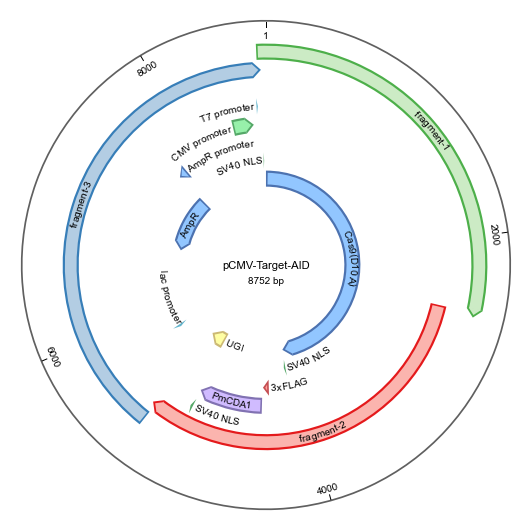

In [31]:
features = pCMV_Target_AID.finddna(query="CDS",key_attribute="feature_type") + pCMV_Target_AID.finddna(query="promoter",key_attribute="feature_type") + pCMV_Target_AID.finddna(query="fragment-[0-9]+",key_attribute="qualifier:label")
fig = visualize(pCMV_Target_AID, feature_list=features, map_view="circular")
fig.savefig("output/pCMV-Target-AID.pdf")

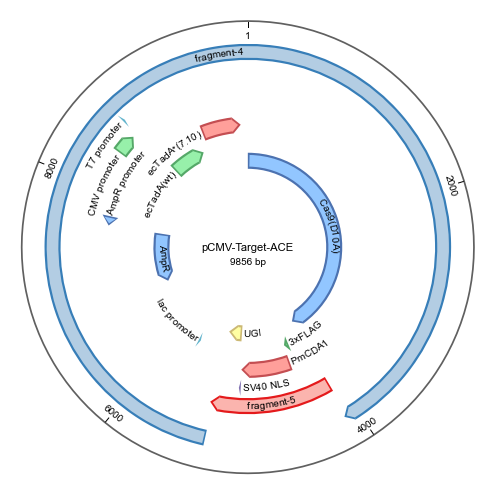

In [32]:
features = pCMV_Target_ACE.finddna(query="CDS",key_attribute="feature_type") + pCMV_Target_ACE.finddna(query="promoter",key_attribute="feature_type") + pCMV_Target_ACE.finddna(query="fragment-[0-9]+",key_attribute="qualifier:label")
fig = visualize(pCMV_Target_ACE, feature_list=features, map_view="circular")
fig.savefig("output/pCMV-Target-ACE.pdf")

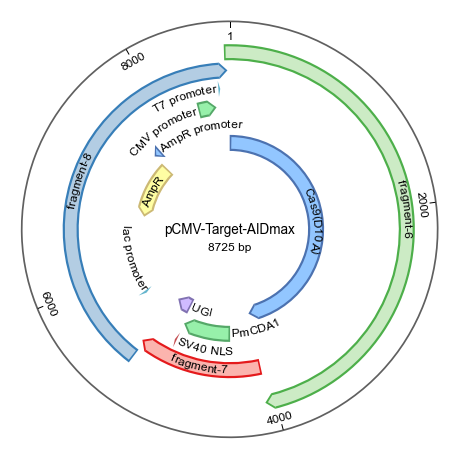

In [33]:
features = pCMV_Target_AIDmax.finddna(query="CDS",key_attribute="feature_type") + pCMV_Target_AIDmax.finddna(query="promoter",key_attribute="feature_type") + pCMV_Target_AIDmax.finddna(query="fragment-[0-9]+",key_attribute="qualifier:label")
fig = visualize(pCMV_Target_AIDmax, feature_list=features, map_view="circular", fontsize=12)
fig.savefig("output/pCMV-Target-AIDmax.pdf")

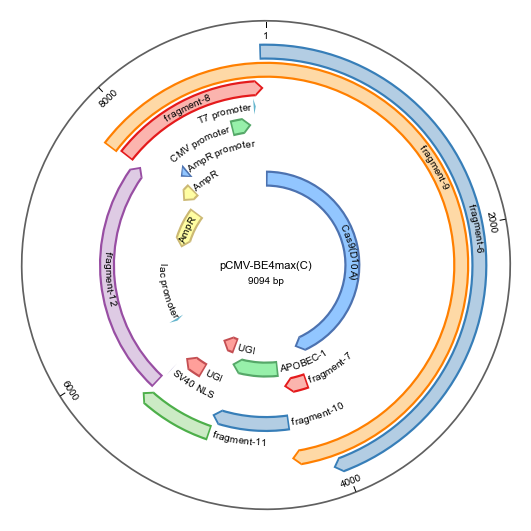

In [34]:
features = pCMV_BE4maxC.finddna(query="CDS",key_attribute="feature_type") + pCMV_BE4maxC.finddna(query="promoter",key_attribute="feature_type") + pCMV_BE4maxC.finddna(query="fragment-[0-9]+",key_attribute="qualifier:label")
fig = visualize(pCMV_BE4maxC, feature_list=features, map_view="circular")
fig.savefig("output/pCMV-BE4max(C).pdf")

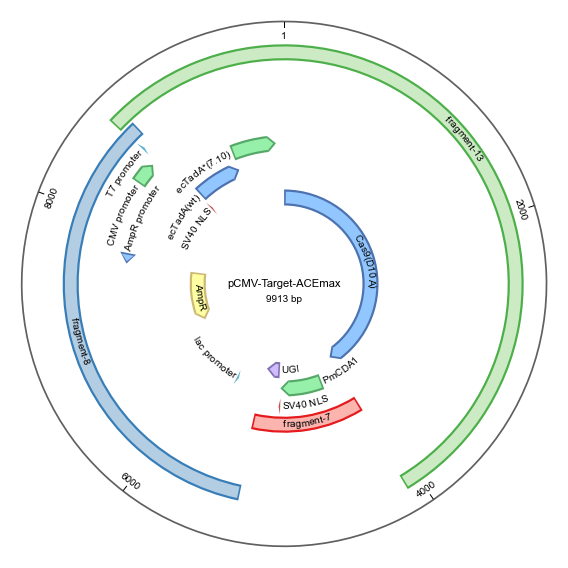

In [35]:
features = pCMV_Target_ACEmax.finddna(query="CDS",key_attribute="feature_type") + pCMV_Target_ACEmax.finddna(query="promoter",key_attribute="feature_type") + pCMV_Target_ACEmax.finddna(query="fragment-[0-9]+",key_attribute="qualifier:label")
fig = visualize(pCMV_Target_ACEmax, feature_list = features, map_view="circular")
fig.savefig("output/pCMV-Target-ACEmax.pdf")

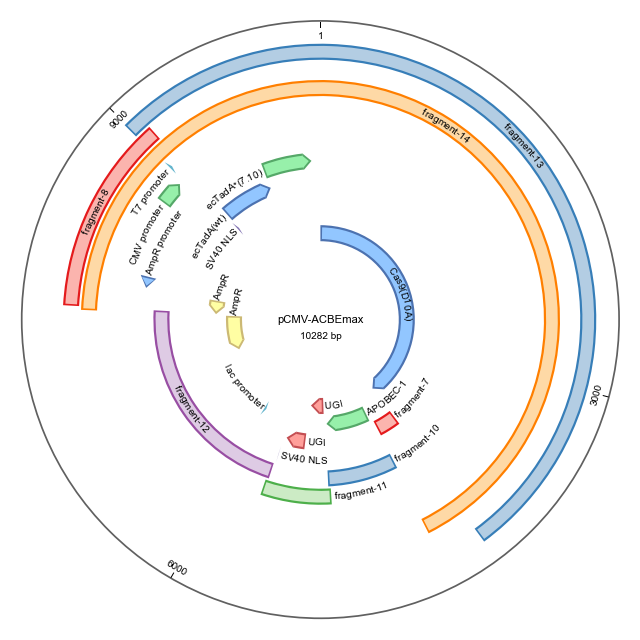

In [36]:
features = pCMV_ACBEmax.finddna(query="CDS",key_attribute="feature_type") + pCMV_ACBEmax.finddna(query="promoter",key_attribute="feature_type") + pCMV_ACBEmax.finddna(query="fragment-[0-9]+",key_attribute="qualifier:label")
fig = visualize(pCMV_ACBEmax, feature_list = features, map_view="circular")
fig.savefig("output/pCMV-ACBEmax.pdf")